# Modelling pandemics using compartmental models

Coronavirus COVID-19 is a pandemic that is spreading quickly worlwide. Up to the 29th of March, there are 666,211 cases confirmed, 30,864 deaths and 141,789 recovered people worldwide. Governments and citizens are taking quick decisions to limit the spread of the virus and minimize the number of infected and deaths. These decisions are taken based on the experts opinion, which justify their claims based in the results of predictive models.


This Jupyter Notebook is an effort to decrease the access barriers to state of the art yet simple models that can be used to take public policy decisions to limit disease spread and save lives. 

## SIR model

Most epidemic models share a common approach on modelling the spread of a disease. The SIR model is a simple deterministic compartmental model to predict disease spread. An objective population is divided in three groups: the susceptible ($S$), the infected ($I$) and the recovered or removed ($R$). These quantities enter the model as fractions of the total population $P$:


$$ S = \frac{\text{Number of susceptible individuals}}{\text{Population size}}$$

$$ I = \frac{\text{Number of infected individuals}}{\text{Population size}}$$

$$ R = \frac{\text{Number of recovered or removed individuals}}{\text{Population size}}$$

As a pandemics infects and kills much more quickly than human natural rates of birth and death, the population size is assumed constant except for the individuals that recover or die. Hence, $S+I+R=P/P=1$. The pandemics dynamics is modelled as a system of ordinary differential equations which governs the rate of change at which the percentage of susceptible, infected and recovered/removed individuals in a population evolve.

The number of possible transmissions is proportional to the number of interactions between the susceptible and infected populations, `$S \times I $`:

$$\frac{dS}{dt} = -\alpha SI.$$

Where $\alpha$ is the reproduction rate of the process which quantifies how many of the interactions between susceptible and infected populations yield to new infections per day.

The population of infected individuals will increase with new infections and decrease with recovered or removed people. 

$$\frac{dI}{dt} = \alpha S I  - \beta I, $$
$$\frac{dR}{dt} = \beta I. $$

Where `$ \beta $` is the percentage of the infected population that is removed from the transmission process per day.

In early stages of the infection, the number of infected people is much lower than the susceptible populations. Hence, $S \approx 1$ making $dI/dt$ linear and the system has the analytical solution $I(t) = I_0 \exp (\alpha - \beta)t$.



### Numerical implementation - SIR model

Three python packages are imported: numpy for numerical computing, matplotlib.pyplot for visualization and the numerical integration routine odeint from scipy.integrate:

In [1]:
import numpy as np # Numerical computing
import matplotlib.pyplot as plt # Visualization
from scipy.integrate import odeint # ODE system numerical integrator
from scipy.optimize import curve_fit # Minimize squared errors using LM method

Implementing systems of ordinary differential equations (ODEs) in python is straightforward. First, a function is created to represent the system inputs and outputs. The inputs of the function are a vector of state variables ${\vec{w}}$, the independent variable $t$ and a vector of parameters $\vec{p}$. The output of the function must be the right hand side of the ODE system as a list.

Following this approach, the SIR model can be implemented as it follows:

$$\vec{w} = [S,I,R]$$
$$\vec{p} = [\alpha, \beta] $$

And $t$ enters directly. The function return will be the list of ODEs.

$$\vec{f} = \left[ \frac{dS}{dt}, \frac{dI}{dt}, \frac{dR}{dt} \right]$$

So $\vec{f} = \text{sir}(\vec{w}, t, \vec{p})$.

The solution of this system is a vector field $\vec{w} = [S(t),I(t),R(t)]$. In day to day words, it gives the percentage of the population who are susceptible (S), infected (I) and recovered or removed R(t) as a function of time. There is no analytical solution for this system. However, a numerical solution can be obtained using a numerical integrator. In this implementation, the function scipy.odeint is used to integrate the differential system. The ODE system of the SIR model was implemented in the function sirx(t,w,p) on the module model.py. The solver is implemented in the function _solve on the module model.py.


## SIR-X model

A new epidemic model based in SIR, SIRX, was developed by the [Robert Koch Institut](http://rocs.hu-berlin.de/corona/docs/forecast/model/#sir-x-dynamics-outbreaks-with-temporally-increasing-interventions) and is implemented in what follows. A full description of the model is available in the [Robert Koch Institut SIRX model webiste](http://rocs.hu-berlin.de/corona/docs/forecast/model/#sir-x-dynamics-outbreaks-with-temporally-increasing-interventions).

The ODE system of the SIR-X model was implemented in the function sirx(t,w,p) on the module model.py

## Usage example



### Case study

The borough of Ealing, in London, is selected arbitrarly as one of the authors is living there at the moment. According to the UK office for National Statistics, the population of Ealing by mid-year 2018 is [342,000](https://www.ealing.gov.uk/info/201048/ealing_facts_and_figures/2184/population_and_households/1). The number of reported infections at 29/03/2020 is 241.

### Model parameters
As an implementation examples, the parameter $\beta$ is estimated from the methodology followed by the [Robert Koch Institut SIRX model webiste](http://rocs.hu-berlin.de/corona/docs/forecast/model/#sir-x-dynamics-outbreaks-with-temporally-increasing-interventions). The institute estimated the a removal rate value $\beta = 0.38/d$ (mean infections time $T_I = 1/\beta = 2.6d)$ based on one third of the reported average infections preioud of moderate cases in Mainland China.

The reproduction number is fixed $R_0 = \alpha / \beta = 2.5$ as a first approximation. 

Please note that the predictions of this model shouldn't be taken in consideratin, as the SIR model doesn't consider dynamic variation of model parameters, which is observed in reality.

### Solution and implementation
The aim of this API is to provide an user friendly approach to build a SIR model and fit it to a target dataset in order to make predictions in few lines of code.


In [2]:
# Use Ealing as an example to determine model initial conditions
# Input data must be np.array
Ealing_data = np.array([8, 18, 20, 28, 31, 42, 53, 54, 80, 97, 106, 123, 136, 165, 209, 241]) # N_of infected

P_Ealing = 342000 # Ealing population ONS 2018 mid year
I_Ealing = 8      # Infected people at 14/03/2020
R_Ealing = 0      # Recovered people at 29/03/2020
n_days = len(Ealing_data)

# Input parameters
beta = 0.38 # Per day
alpha = 2.5 * beta # WHO estimate

### Calculate model parameters and initial conditions

In [3]:
# Calculate initial conditions in terms of total number of individuals
S0 = (P_Ealing-I_Ealing)
I0 = I_Ealing
R0 = R_Ealing    # Recovered people

# Construct vector of parameters
params = [alpha, beta]

# Construct vector of initial conditions
w0 = [S0, I0, R0]

### Build the model with the default parameters and predict the number of susceptible, infected and recovered people in the Ealing borough.

In [4]:
# These lines are required only if opensir wasn't installed using pip install, or if opensir is running in the pipenv virtual environment
import sys
path_opensir = '../../'
sys.path.append(path_opensir)

# Import SIR and SIRX models
from opensir.models import SIR, SIRX

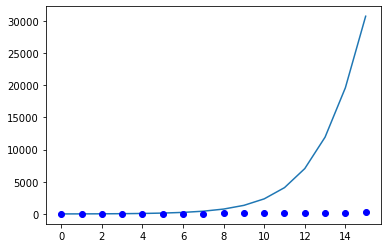

2.5

In [5]:
# Initialize an emplty SIR model
my_SIR = SIR()
# Set model parameters
my_SIR.set_params(p=params,initial_conds=w0)

# Call model.solve functions with the time in days and the number of points
# as the number of days
my_SIR.solve(n_days-1, n_days)
# Unpack the numerical solution using the model.fetch() method
sol = my_SIR.fetch()
# Unpack the numerical solution for the susceptible (S), infected (I) and recovered or removed (R)
S_sir = sol[:,1]
I_sir = sol[:,2]
R_sir = sol[:,3]
# Plot the results
# Define array of days. Note that the initial day is the day "zero", so 
# the final day is the number of days minus one. This is divided in n_days
# intervals to be consistent with the input
days_list = np.linspace(0, n_days-1, n_days)
plt.plot(days_list, I_sir)
plt.plot(days_list, Ealing_data,'bo')
plt.show()
my_SIR.r0

If the default parameters are used, the results are completely unreliable. Indeed, the model predicts more than 150 times more people infected. This is why a model shouldn't be used blindly, and always the parameters must be checked. In UK, Social distancing started voluntarily on the 16th of February, and the lockdown started on the 23rd of February. The effect of this policy change in terms of our model, is a decrease in the reproduction rate $R_0 = \alpha / \beta$. As the national health system (NHS) of UK didn't reach full capacity on the period between the 15th and the 29th of March, it is reasonable to assume that the main change occured owing to a decrease in the transmission rate $\alpha$.

To obtain a more realistic approximation, the parameter can be modified to better reproduce the observed data. This process is named **parameter fitting** and it is widely used not only on epidemiology, but in any discipline which uses mathematical models to make prediction. 


The function model.fit() enables to fit the desired parameters to a certain dataset. The parameter fitting is straightforward using open-sir:

### Parameter Fitting 
Fitting $R_0$ through $\alpha$ keeping $\beta$ constant

In the following case study, $R_0$ will be fitted to minimize the mean squared error between the model predictions and UK historical data on the Ealing borough in the time period between the 15th and the 29th of March of 2020.

Fitted reproduction rate R_0 = 1.61


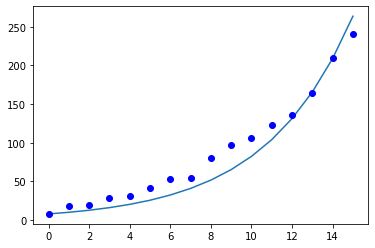

In [6]:
# Create SIR with default parameters
my_SIR_fitted = SIR()
my_SIR_fitted.set_params(params,w0)

# Fit parameters
w = my_SIR_fitted.fit(days_list, Ealing_data, fit_index=[True,False])
# Print the fitted reproduction rate
print("Fitted reproduction rate R_0 = %.2f" % my_SIR_fitted.r0)
# Build the new solution
my_SIR_fitted.solve(n_days-1, n_days)
# Extract solution
sol = my_SIR_fitted.fetch()
# Plot the results

plt.plot(days_list,sol[:,2])
plt.plot(days_list,Ealing_data,'bo')
plt.show()

In [7]:
Ealing_data

array([  8,  18,  20,  28,  31,  42,  53,  54,  80,  97, 106, 123, 136,
       165, 209, 241])

## DANGER ZONE

This is extremely dangerous as $R_0$ is extremely likely to change with time. However we have seen many people taking decisions in this kind of analysis. Use it at your own risk and with a metric ton of salt.

### Example: predict the total number of infections and the time where the number of infected people is maximum


In [8]:
long_term_days = 90
# Convert into seconds
tf_long = long_term_days-1
sol_long = my_SIR_fitted.solve(tf_long, long_term_days).fetch()
N_S_long = sol_long[:,1]
N_I_long = sol_long[:,2]
N_R_long = sol_long[:,3]

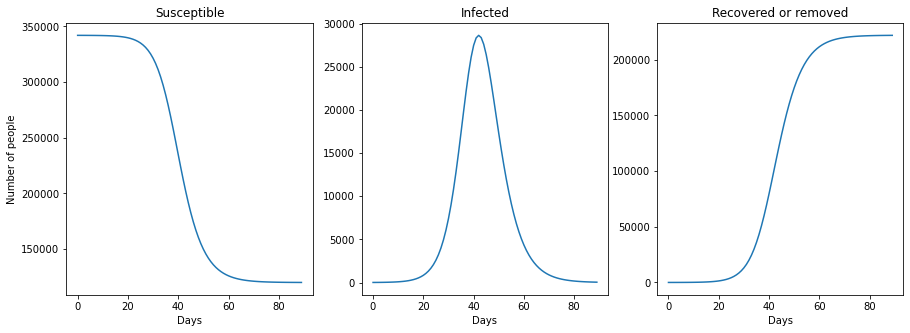

In [9]:
# Plot the number of susceptible, infected and recovered in a two months period
tspan_long = np.linspace(0,tf_long,long_term_days)
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
plt.plot(tspan_long,N_S_long)
plt.xlabel('Days')
plt.ylabel("Number of people")
plt.title("Susceptible")
plt.subplot(1,3,2)
plt.plot(tspan_long,N_I_long)
plt.xlabel('Days')
plt.title("Infected")
plt.subplot(1,3,3)
plt.plot(tspan_long,N_R_long)
plt.title("Recovered or removed")
plt.xlabel('Days')
plt.show()

It can be observed that the SIR model reproduces the all familiar infection bell, as well as the evolution of susceptible and recovered population. It is interesting to observe that if no measures are taken in a $R_0 = 1.47$ scenario, 65% of the Ealing population would be infected in three months.

### Sensitivity to $R_0$

A known weakness of all pandemics prediction model is the sensitivity to their parameters. In the following case study, $R_0$ will be fitted to minimize the mean squared error between the model predictions and UK historical data on the Ealing borough in the time period between the 15th and the 29th of March of 2020.

In [10]:
def compare_infections(model, tf, numpoints, alpha_list=2.5, abserr=1e-8, relerr=1e-6):
    """ compare_infections compare SIR model predictions against
    a list of alpha values
    
    Inputs:
    w0: Initial conditions
    t: Time vector /
    alpha_list: list or numpy array of values of alpha to be tested
    
    Outputs:
    S_list: List of predictions for the fraction of susceptible population for each alpha
    I_list: List of predictions for the fraction of infected population for each alpha
    R_list: List of predictions for the fraction of recovered/removed population for each alpha
    """
    S_list = []
    I_list = []
    R_list = []
    
    for i in alpha_list:
        # Update parameter list
        model.p[0] = i
        wsol=model.solve(tf,numpoints).fetch()
        S_list.append(wsol[:,1])
        I_list.append(wsol[:,2])
        R_list.append(wsol[:,3]) 
    return S_list, I_list, R_list


### Generate predictions for each alpha

In [11]:
alpha_list = beta*np.array([1.5,1.6,1.7])
S_list, I_list, R_list = compare_infections(my_SIR, tf_long, long_term_days, alpha_list)

C:\Users\Felipe\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
C:\Users\Felipe\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Felipe\AppData\Roaming\Python\Python37\site-packages\ipykernel_lau

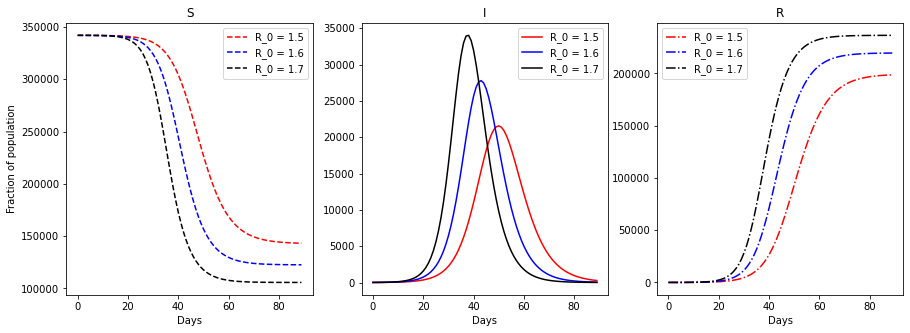

In [12]:
col = ['r','b','k']
plt.figure(figsize=[15,5])
for i in range(len(S_list)):
    plt.subplot(1,3,1)
    plt.plot(tspan_long,S_list[i], col[i]+"--")
    plt.legend(['R_0 = 1.5','R_0 = 1.6','R_0 = 1.7']) 
    plt.xlabel('Days')
    plt.ylabel('Fraction of population')
    plt.title('S')
    plt.subplot(1,3,2)
    plt.plot(tspan_long,I_list[i], col[i])
    plt.legend(['R_0 = 1.5','R_0 = 1.6','R_0 = 1.7']) 
    plt.xlabel('Days')
    plt.title('I')
    plt.subplot(1,3,3)
    plt.plot(tspan_long,R_list[i], col[i]+"-.")
    plt.legend(['R_0 = 1.5','R_0 = 1.6','R_0 = 1.7']) 
    plt.xlabel('Days')
    plt.title('R')

plt.show()

We observe that a change as little as 6% in the reproduction rate, can change dramatically the dynamic of the pandemic

### Example 4: Fit R_0 for UK values
[sourced from UK Arcgis](https://www.arcgis.com/apps/opsdashboard/index.html#/f94c3c90da5b4e9f9a0b19484dd4bb14)

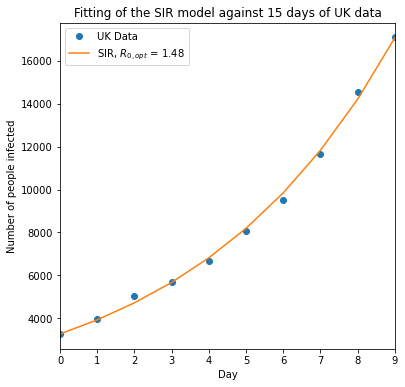

In [13]:
P_UK = 67886011
# Data up to 28th of March
I_UK= np.array([3269, 3983, 5018, 5683, 6650, 8077, 9529, 11658, 14543, 17089])
n_days = len(I_UK) # Final day
t_d = np.linspace(0,n_days-1,n_days)

n_S0 = P_UK-I_UK[0]
n_I0 = I_UK[0]
n_R0 = 0
n0_UK = [n_S0, n_I0, n_R0]
p = [alpha,beta]

# Create empty model
SIR_UK = SIR()
SIR_UK.set_params(p,n0_UK)
# Train model
SIR_UK.fit(t_d, I_UK)
# Build numerical solution
I_opt = SIR_UK.solve(n_days-1,n_days).fetch()[:,2]
# lag = 6

R_opt = SIR_UK.r0 # 

plt.figure(figsize=[6,6])
plt.plot(t_d,I_UK,'o')
plt.plot(t_d, I_opt)
plt.legend(["UK Data","SIR, $R_{0,opt}$ = %.2f"%R_opt])
plt.title("Fitting of the SIR model against 15 days of UK data")
plt.ylabel("Number of people infected")
plt.xlabel("Day")
plt.xlim([min(t_d),max(t_d)])
plt.show()


In [14]:
MSE = sum(np.sqrt((I_opt-I_UK)**2))/len(I_UK)        
print("Mean squared error on the model in the train dataset %.2f" % MSE)

Mean squared error on the model in the train dataset 147.51


The mean squared error calculated above indicates the average error difference between the model fitting and the train data. It is a measure of wellness of fit, but it doesn't provide information about how accurately the model predicts the number of infected.

The error in the future predictions can be estimating through confidence intervals.

### Making out of sample predictions using the `model.predict` function

The `model.predict` function allows out of sample predictions. It recieves one mandatory parameter, n_days, and two optional parameters. The two optional parameters are the observed number of infected (`n_I`) and the number of recovered (`n_R`) individuals. If `n_I` is not provided, the last value of the train set is used, while if `n_R` is not provided it is estimated from the fitted SIR model.

In [15]:
# Obtain the results 7 days after the train data ends
pred_7 = SIR_UK.predict(7)
print(' Future days\t pred_suscept    pred_infected\tpred_recovered')
print(pred_7)

 Future days	 pred_suscept    pred_infected	pred_recovered
[[0.00000000e+00 6.78403485e+07 1.70890000e+04 2.85735364e+04]
 [1.00000000e+00 6.78297797e+07 2.05295424e+04 3.57017177e+04]
 [2.00000000e+00 6.78170873e+07 2.46599820e+04 4.42637488e+04]
 [3.00000000e+00 6.78018442e+07 2.96183249e+04 5.45484650e+04]
 [4.00000000e+00 6.77835431e+07 3.55683579e+04 6.68995497e+04]
 [5.00000000e+00 6.77615738e+07 4.27065911e+04 8.17306542e+04]
 [6.00000000e+00 6.77352070e+07 5.12672742e+04 9.95367353e+04]
 [7.00000000e+00 6.77035723e+07 6.15291710e+04 1.20909496e+05]]


Where: 
* The first column represents the days since the last day of the data that was used to fit the model
* The second column represents the number of susceptible
* The third column represents the number of infected
* The fourth column represents the number of recovered / removed

## Visualize predictions

Predict the next seven days of the spread of COVID-19 in the UK, considering the 29th of March as the last day of the sample data on which the SIR model was fitted.

In [16]:
import datetime # Import datetime module from the standard library
# Create a date time range based on the number of rows of the prediction
numdays = pred_7.shape[0] 
day_zero = datetime.datetime(2020,3,29)
date_list = [day_zero + datetime.timedelta(days=x) for x in range(numdays)]

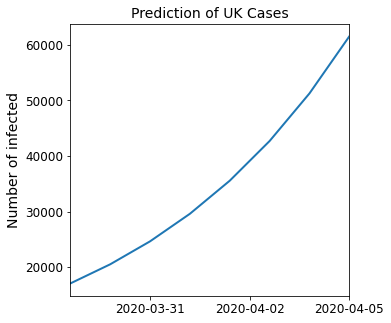

In [17]:
# Extract figure and axes
fig, ax = plt.subplots(figsize=[5,5])
# plt.plot(pred_7[:,0], pred_7[:,2], linewidth=2)
plt.plot(date_list, pred_7[:,2], linewidth=2)
plt.title('Prediction of UK Cases', size=14)
plt.ylabel('Number of infected', size=14)
# Remove trailing space
plt.xlim(date_list[0],date_list[-1])
# Limit the amount of data displayed
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
# Increase the size of the ticks
ax.tick_params(labelsize=12)
plt.show()

### Calculate confidence intervals

In [18]:
# Get the confidence interval through random bootstrap
# Define bootstrap options
options = {"alpha":0.95, "n_iter":1000, "r0_ci":True}
# Call bootstrap
par_ci, par_list = SIR_UK.ci_bootstrap(**options)

In [19]:
print("Confidence intervals of alpha, beta and R_0")
print(par_ci)

Confidence intervals of alpha, beta and R_0
[[0.55284304 0.5657192 ]
 [0.38       0.38      ]
 [1.4548501  1.48873473]]


In [20]:
alpha_min = par_ci[0][0]
alpha_max = par_ci[0][1]
# Explore the confidence intervals
print("IC 95% for alpha:", par_ci[0])
print("IC 95% for beta:", par_ci[1])
print("IC 95% for r0:", par_ci[2])

IC 95% for alpha: [0.55284304 0.5657192 ]
IC 95% for beta: [0.38 0.38]
IC 95% for r0: [1.4548501  1.48873473]


### Visualization of confidence intervals

After 1000 of random sampling of the train data, it is possible to visualize the range of predictions produced within the 95% confidence intervals.

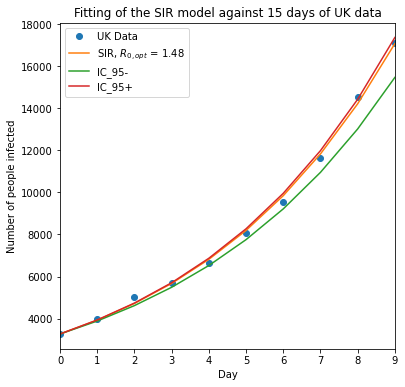

In [21]:
# Build numerical solution
# I_opt = SIR_UK.solve(n_days-1, n_days).fetch()[:,2]
beta_0 = SIR_UK.p[1]
SIR_minus = SIR().set_params([alpha_min, beta_0],n0_UK)
SIR_plus = SIR().set_params([alpha_max, beta_0],n0_UK)
I_minus = SIR_minus.solve(n_days-1, n_days).fetch()[:,2]
I_plus = SIR_plus.solve(n_days-1, n_days).fetch()[:,2]

# lag = 6

R_opt = SIR_UK.r0 # 

plt.figure(figsize=[6,6])
plt.plot(t_d,I_UK,'o')
plt.plot(t_d, I_opt)
plt.plot(t_d, I_minus)
plt.plot(t_d, I_plus)
plt.legend(["UK Data","SIR, $R_{0,opt}$ = %.2f"%R_opt,"IC_95-","IC_95+"])
plt.title("Fitting of the SIR model against 15 days of UK data")
plt.ylabel("Number of people infected")
plt.xlabel("Day")
plt.xlim([min(t_d),max(t_d)])
plt.show()

An extremely asymmetrical confidence interval for $R_0$ using simple random bootstrap is observed. This occurs most likely because of 
neglecting the temporal structure of the exponential.

To further investigate this phenomena, we can observe the distribution of the $R_0$ parameter on the parameter list

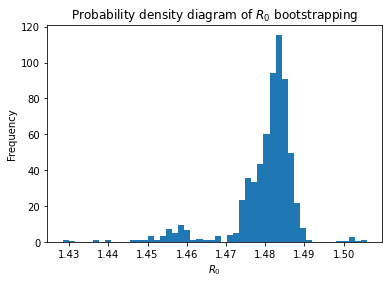

In [22]:
plt.hist(par_list[:,0]/par_list[:,1], bins=50, density=True, stacked=True)
plt.xlabel('$R_0$')
plt.ylabel('Frequency')
plt.title("Probability density diagram of $R_0$ bootstrapping")
plt.show()

It is interesting to observe that the spread is assymetrical towards lower $R_0$ values. This asymmetry is expected owing to the effect of lockdowns and public policies to promote social distancing. A strong assumption of the SIR model is that the spread rate $\alpha$ and removal rate $\beta$ are constant, which is not the case in reality specially when strong public policies to limit the spread of a virus take place.

### Evaluate model performance through block cross validation

A reliable approach to evaluate the predictive accuracy of a model which variables are time-dependent is to use block cross validation. In Open-SIR, it is implemented through the `model.block_cv` function. The inputs of the model is the minimum sample to use to perform the cross validation. The outputs of the model are lists with the average mean squared error, rolling mean squared error, evolution of the fitted parameters and a `PredictionResults` dataclass.

In [23]:
# We previously imported ci_block_cv which provides a better prediction of the mean squared error of the predictions
n_lags=1
MSE_avg, MSE_list, p_list, pred_data = SIR_UK.block_cv(lags=n_lags, min_sample=3)

This `pred_data` instance of the `PredictionResults` dataclass offers a simplified syntax to access details of the cross-validation test on model predictions. For instance, the member function `.print_mse()` prints a summary of the mean-squared errors for different forecasts horizons. The number of forecasts horizons provided is by default the length of the observations minus the min_sample parameter.

In [24]:
pred_data.print_mse()

Average MSE for 0-day predictions = 281.77, MSE sample size = 7
Average MSE for 1-day predictions = 486.87, MSE sample size = 6
Average MSE for 2-day predictions = 681.41, MSE sample size = 5
Average MSE for 3-day predictions = 947.02, MSE sample size = 4
Average MSE for 4-day predictions = 1181.14, MSE sample size = 3
Average MSE for 5-day predictions = 2247.43, MSE sample size = 2
Average MSE for 6-day predictions = 4896.45, MSE sample size = 1


If the residuals between the model and the observed data are normally distributed , the mean squared error is an estimator of the error variance. The member function `.plot_predictions(n_days)` offers a convenient ways to visualize short term predictions with an estimations of the 66% and 95% confidence intervals.

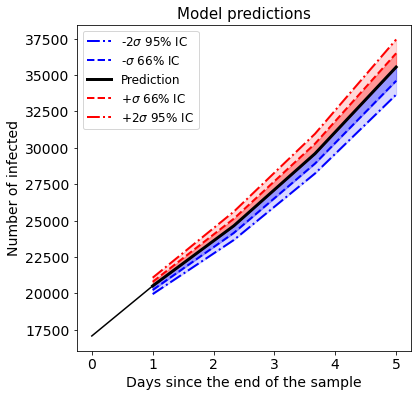

In [25]:
pred_data.plot_predictions(4)

The robustness of the model fitting can be explored plotting the change of the parameters during the block cross validation. As the model is fitted with more and more recent data, a measure of robustness is the convergence of the model parameters to a particular value. The list `p_list` contains the information of all model parameters, which can be plotted to assess parameter convergence.

Block cross validation parametric range


Text(0, 0.5, 'alpha')

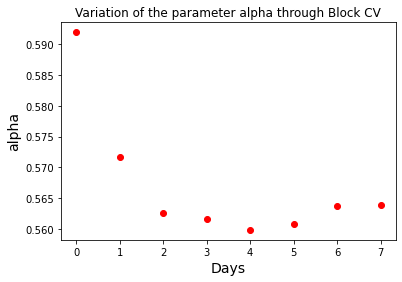

In [26]:
print("Block cross validation parametric range")
plt.plot(p_list[:,0],'ro')
plt.title("Variation of the parameter alpha through Block CV")
plt.xlabel("Days", size=14)
plt.ylabel("alpha", size=14)

It is clear that the $\alpha$ parameter is converging to a value between 0.56 and 0.57 as time progresses. This results have to be reassessed as new data appears, as some fundamental change in the disease epidemiology or social distance may occur suddenly.

The `MSE_avg` list contains the mean squared errors for a forecast of the day $i+1$ since the fitting data ends. For example, the average mean squared error for one day predictions can be accessed on `MSE_avg[0]`

In [27]:
print("The average mean squared error on the time cross validation bootstrapping is: %.3f" % MSE_avg[0])

The average mean squared error on the time cross validation bootstrapping is: 281.774


Another way to visualize the results of the block cross-validation, is to observe the variation of the reproduction rate $R_0$ and the mean squared error when a subset of the days is taken. By default, `block_cv` starts with the data of three days, fit the model on that data, predicts the number of infected in the next period, calculate the mean squared error between the prediction and the test dataset, and stores it into two arrays. Afterwards, it computes the MSE of 2,3 and up to `len(n_obs)-min_sample` days to be forecasted. It repeats this until it uses the data of $(n-1)$ intervals to predict the $n-th$ latest observation of infections.

In the next example, the list of the mean-squared errors for 1-day prediction is visualized

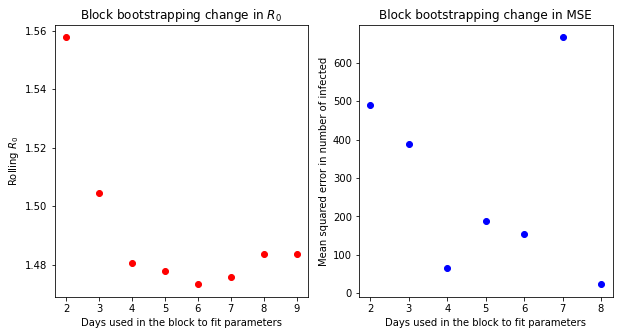

In [28]:
r0_roll = p_list[:,0]/p_list[:,1]

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.plot(t_d[2:], r0_roll,'ro')
plt.xlabel("Days used in the block to fit parameters")
plt.ylabel("Rolling $R_0$")
plt.title("Block bootstrapping change in $R_0$")
plt.subplot(1,2,2)
plt.plot(t_d[(2):-1], MSE_list[0],'bo')
plt.xlabel("Days used in the block to fit parameters")
plt.ylabel("Mean squared error in number of infected")
plt.title("Block bootstrapping change in MSE")
plt.show()

Interestingly, it is hard to see any convergence on the change on mean-squared error.

In [29]:
print("MSE_lastday = %.2f" % MSE_list[0][-1])

MSE_lastday = 22.76


Note that the mean squared error is provided in absolute terms. However, the number of infected cases is increasing with time. 

The percentage error of the predictions can be calculated directly from the mean squared error. 

$$\epsilon(t) = \frac{\mathrm{MSE}(t)}{I(t)}$$

For example, in the last entry of I_UK, they were 17089 infected, while the MSE was 666.45. Then, the percentage deviation would be:

$$\epsilon(10) = \frac{22.76}{17089} = 0.13\%$$ 

However, this takes model prediction over the accumulated number of cases. Another way to quantify the deviation of the model predictions is to calculate the percentage error over the new infected cases:

$$\epsilon_{\mathrm{new}}(t) = \frac{\mathrm{MSE}(t)}{I(t)-I(t-1)}$$

If this metric is used, the error naturally will be higher. 

In [30]:
e_new = MSE_list[0][-1]/(I_UK[-1]-I_UK[-2])
print("The percentage error of the SIR model over the last day reported cases is %.1f%%" % (100*e_new))

The percentage error of the SIR model over the last day reported cases is 0.9%


It must be noted that in the last day studied, the error is extremely low owing to an exceptionally good agreement on the last point of the data. Hence, a better estimate of the error in the predictions is to take the average percentage error on the cross validation subset, which considers from day 3 onwards.

In [31]:
eps_avg = np.mean(MSE_list[0]/I_UK[-7:])*100
print("The average percentage deviation on the number of infected is %.1f%%" % eps_avg)

The average percentage deviation on the number of infected is 3.3%


### Visualize long term predictions

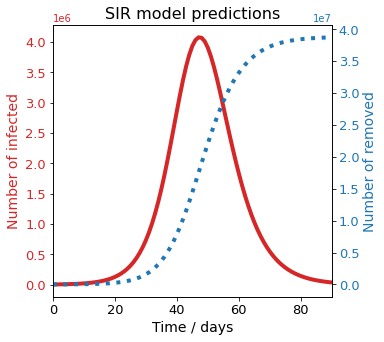

In [32]:
long_time=90
SIR_UK.solve(long_time, long_time+1)
SIR_UK.plot()

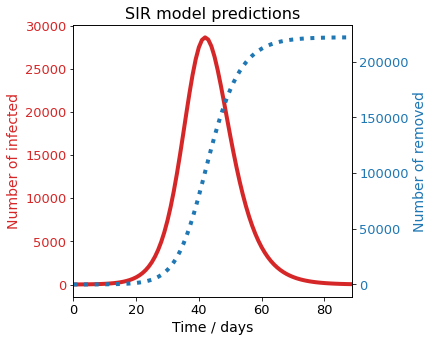

In [33]:
my_SIR_fitted.plot()